In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn as sk
import pandas as pd
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

path = "bank-additional-full.csv"
df = pd.read_csv(path,sep=';')
df_dummies = pd.get_dummies(df)
df_dummies.head()
del df_dummies['duration']
del df_dummies['y_no']
df_dummies.head()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


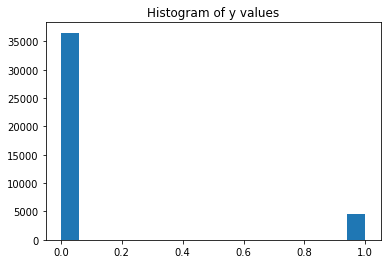

In [2]:
y_df = df_dummies['y_yes'].copy()
x_df = df_dummies.drop(['y_yes'],axis=1).copy()
#df_pred2.values
plt.hist(y_df.values,bins='auto')
plt.title("Histogram of y values")
plt.show()

In [3]:
clf3 = tree.DecisionTreeClassifier(criterion = "entropy")
clf3.fit(x_df,y_df)
scores = cross_val_score(clf3,x_df,y_df,cv=10,scoring=make_scorer(acc))
print("Accuracy %0.2f",scores.mean())


Accuracy %0.2f 0.26475483317397747


In [4]:
#get feature importances
importances = clf3.feature_importances_
feature_importances = pd.DataFrame(importances,x_df.columns,columns = ['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                               importance
age                              0.159182
nr.employed                      0.156957
euribor3m                        0.091982
campaign                         0.081373
cons.conf.idx                    0.028336
pdays                            0.026470
housing_no                       0.020931
job_admin.                       0.019743
housing_yes                      0.018794
loan_yes                         0.017459
marital_married                  0.017307
education_university.degree      0.017185
day_of_week_mon                  0.016790
education_high.school            0.016316
marital_single                   0.016208
day_of_week_wed                  0.014327
education_basic.9y               0.013876
day_of_week_thu                  0.013484
job_technician                   0.013314
day_of_week_fri                  0.012841
cons.price.idx                   0.012796
day_of_week_tue                  0.012631
marital_divorced                 0

In [5]:
#plot confusion matrix.


#predict the values of y against x.
y_pred = clf3.predict(x_df)
#compare predicted with actual y values.
cnf_matrix = confusion_matrix(y_df,y_pred)
#normalise the matrix
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:,np.newaxis]


Text(0.5, 13.421126458070283, 'predicted label')

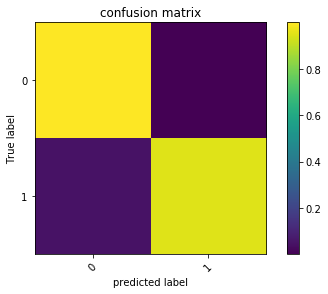

In [6]:
plt.figure()
plt.imshow(cnf_matrix,interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar()
classes = range(len(set(y_df)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes, rotation = 45)
plt.yticks(tick_marks,classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')